# Gradyan Inis

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd

import seaborn as sns
sns.set()

In [2]:
def cost(w):
    return ((w-3)**2)+5

def derivative(w):
    return 2*(w-3)

def gradient_descent(w = 0, alpha = 0.05, number_steps = 10):
    """
    w : initial value of parameter w
    alpha : step size
    """
    W = np.zeros(number_steps)
    for i in range(number_steps):
        W[i] = w
        w = w - alpha * derivative(w)

    return W

Text(0.5, 1.0, 'alpha = 0.05')

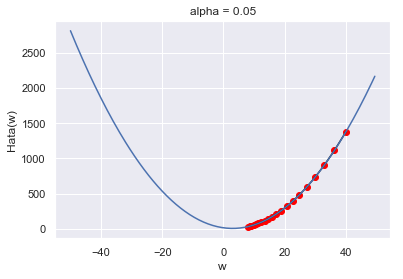

In [3]:
a = 0.05
W = gradient_descent(w = 40, alpha = a, number_steps = 20)
t = np.arange(-50,50,0.5)

plt.plot(W,cost(W),'k')
plt.scatter(W,cost(W), color = 'red')
plt.plot(t,cost(t))
plt.xlabel('w'); plt.ylabel('Hata(w)'); plt.title("alpha = " + str(a))

Text(0.5, 1.0, 'alpha = 0.95')

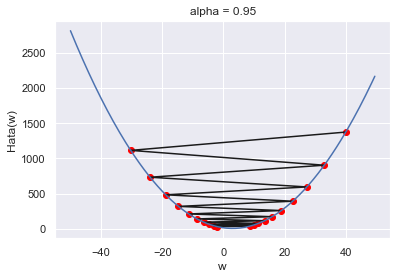

In [4]:
a = 0.95
W = gradient_descent(w = 40, alpha = a, number_steps = 20)
t = np.arange(-50,50,0.5)

plt.plot(W,cost(W),'k')
plt.scatter(W,cost(W), color = 'red')
plt.plot(t,cost(t))
plt.xlabel('w'); plt.ylabel('Hata(w)'); plt.title("alpha = " + str(a))

Text(0.5, 1.0, 'alpha = 1')

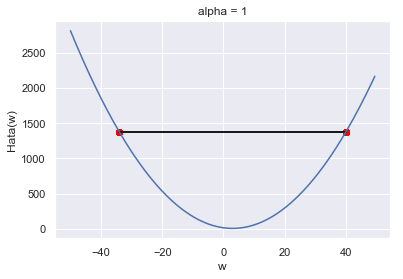

In [5]:
a = 1
W = gradient_descent(w = 40, alpha = a, number_steps = 20)
t = np.arange(-50,50,0.5)

plt.plot(W,cost(W),'k')
plt.scatter(W,cost(W), color = 'red')
plt.plot(t,cost(t))
plt.xlabel('w'); plt.ylabel('Hata(w)'); plt.title("alpha = " + str(a))

Text(0.5, 1.0, 'alpha = 1.1')

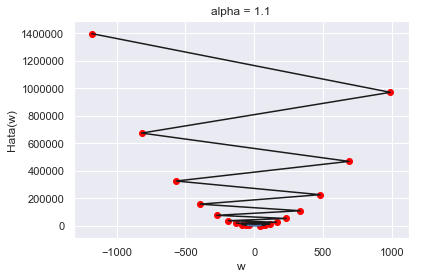

In [6]:
a = 1.1
W = gradient_descent(w = 40, alpha = a, number_steps = 20)
t = np.arange(-50,50,0.5)

plt.plot(W,cost(W),'k')
plt.scatter(W,cost(W), color = 'red')
plt.plot(t,cost(t))
plt.xlabel('w'); plt.ylabel('Hata(w)'); plt.title("alpha = " + str(a))

# Onemli Not
> Parametreleri gradyan inisle guncellemenize ragmen, hataniz artiyorsa $\alpha$`:adim buyukulugu` hiper-parametrenizi degistirin

# Lineer Regresyon

> Buradaki en onemli konu, kullanilan notasyondur.

$X \in R^{[d\times n]}$ veri matrisinde her bir sutun, $d$ boyutlu yeni bir gozlemdir. Elimizde $n$ adet gozlem bulunmaktadir.


## Tek Oznitelik
![](resim/3regresyon.JPG)

## Coklu Oznitelik
![](resim/4regresyon.JPG)

# Makineye Toplamayi Ogretmek

Lineer Regresyon ile Makineye Toplamayi Ogretmek

# Verimizi olusturalim

> En iyi parametre degerleri `w = [1 1 ... 1].T` ve `b = 10`. Acaba Lineer regresyon ve gradyan inisle bu degerleri bulabilir miyiz? 

In [7]:
d = 3     # oznitelik sayisi
n = 100   # ornek sayisi

X = np.random.randint(0,100, size = (d,n))
w_gizli = np.ones((d,1))
b_gizli = 10
y = np.dot(w_gizli.T, X) + b_gizli

oznitelik_isimleri = ['not'+str(i) for i in range(d)] + ['toplam']
veri = pd.DataFrame(data = np.concatenate((X,y)).T, columns  = oznitelik_isimleri)
veri.shape

(100, 4)

In [8]:
veri.head()

,not0,not1,not2,toplam
0,32.0,1.0,81.0,124.0
1,57.0,87.0,18.0,172.0
2,75.0,76.0,77.0,238.0
3,5.0,83.0,24.0,122.0
4,79.0,87.0,67.0,243.0


In [9]:
print("Tahmin etmek istedigimiz parametreler")
print("\tw = {}.T".format(w_gizli.T))
print("\tb = {}".format(b_gizli))

Tahmin etmek istedigimiz parametreler
	w = [[1. 1. 1.]].T
	b = 10


## El yapimi Lineer regresyon baslasin 


In [10]:
X = veri.iloc[:, :-1].values
#X = (X - X.mean(axis = 0))/ (X.std(axis = 0)) # normallestirme

y = veri.iloc[:, -1:].values
#y = (y - y.mean(axis = 0))/ (y.std(axis = 0)) # normallestirme

In [11]:
X.shape, y.shape

((100, 3), (100, 1))

In [12]:
X = X.T
y = y.T

X.shape, y.shape

((3, 100), (1, 100))

> $X \in R^{[d\times n]}$ veri matrisinde her bir sutun, $d$ boyutlu yeni bir gozlemdir. Elimizde $n$ adet gozlem bulunmaktadir.

Asagida X matrisindeki ilk 3 gozlemi goruyoruz.

In [13]:
X[:,:3].T

array([[32.,  1., 81.],
       [57., 87., 18.],
       [75., 76., 77.]])

In [14]:
y[:,:3].T

array([[124.],
       [172.],
       [238.]])

### Parametreler
 - baslangicta rastgele deger ataniyor

In [15]:
w  = np.random.rand(X.shape[0],1)
w

array([[0.96767193],
       [0.96629138],
       [0.27874421]])

In [16]:
b = np.random.rand()
b

0.7127751473857576

### hipotezimiz

$ h = \hat{y} = w^{T} x + b$

In [17]:
h = np.dot(w.T, X) + b
h.shape

(1, 100)

### Hatamiz

In [18]:
hata = y - h
hata.shape

(1, 100)

### Toplam hata fonksiyonu

$ J = \frac{1}{2n}\sum (y - \hat{y})^2 = w^{T} x + b$

In [19]:
J = np.sum(np.power(hata,2)) / (2*len(hata))
J

130506.3829196332

# Hatayi minimize eden w,b parametrelerini bulalim

## Parametre guncelleme

In [20]:
alpha = 0.00001

In [21]:
dw = X.dot(hata.T)/len(hata)
dw

array([[212889.73940701],
       [225032.50381888],
       [280740.41159456]])

In [22]:
w = w - alpha * dw
w

array([[-1.16122546],
       [-1.28403366],
       [-2.5286599 ]])

In [23]:
db = np.mean(hata)
db

47.440727260016956

In [24]:
b = b - alpha * db
b

0.7123007401131575

# Lineer regresyon
## Gradyan Inis 

In [25]:
d = 3     # oznitelik sayisi
n = 100   # ornek sayisi

alpha =  0.00001
Js = []
w  = np.random.rand(d,1) # rastgele d agirlik parametre degeri
b = np.random.rand()     # ratgeele 1 bias paarmetre degeri

for i in range(100):
    # ileri yayilim
    h = np.dot(w.T, X) + b
    # geri yayilim
    dw = (1 / n) * np.dot(X, (h - y).T)
    db = (1 / n) * np.sum(h - y)
    # Egim Inis
    w = w - alpha * dw
    b = b - alpha * db
    
    if i%100:
        Js.append((1 / (2 * n)) * np.sum(np.power(h - y,2)))
    
print("w: {}\nb:{}".format(w,b))

w: [[1.0313034 ]
 [1.13910829]
 [1.00288174]]
b:0.7483662808830004


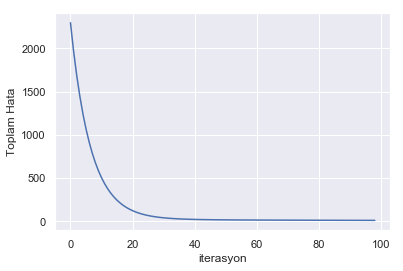

In [26]:
plt.plot(Js)
plt.xlabel('iterasyon'); plt.ylabel('Toplam Hata'); 

In [27]:
print("Tahmin etmek istedigimiz parametreler")
print("\tw = {}.T".format(w_gizli.T))
print("\tb = {}".format(b_gizli))

Tahmin etmek istedigimiz parametreler
	w = [[1. 1. 1.]].T
	b = 10


In [28]:
print("Buldugumuz parametre degerleri")
print("\tw = {}.T".format(w.T))
print("\tb = {}".format(b))

Buldugumuz parametre degerleri
	w = [[1.0313034  1.13910829 1.00288174]].T
	b = 0.7483662808830004


In [29]:
class Regro():
    def __init__(self, veri, alpha =  0.0001, iterasyon = 1000):
        self.X = veri.iloc[:, :-1].values.T
        self.y = veri.iloc[:, -1:].values.T
        
        self.d = self.X.shape[0] # oznitelik sayisi
        self.n = self.X.shape[1] # ornek sayisi
        
        self.alpha = alpha
        self.iterasyon = iterasyon
        
        self.w  = np.random.rand(self.d,1) # rastgele d agirlik parametre degeri
        self.b = np.random.rand() # ratgeele 1 bias paarmetre degeri
        
    
    def fit(self):
        self.Js = [] 

        for i in range(self.iterasyon):
            # ileri yayilim
            h = np.dot(self.w.T, self.X) + self.b
            # geri yayilim
            dw = (1 / self.n) * np.dot(self.X, (h - self.y).T)
            db = (1 / self.n) * np.sum(h - self.y)
            # Egim Inis
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db

            if i%100:
                self.Js.append((1 / (2 * n)) * np.sum(np.power(h - self.y,2)))


In [42]:
reg = Regro(veri, alpha =  0.00001, iterasyon = 1000000)
reg.fit()

In [43]:
print("Buldugumuz parametre degerleri")
print("\tw = {}.T".format(reg.w.T))
print("\tb = {}".format(reg.b))

Buldugumuz parametre degerleri
	w = [[1.01776916 1.01866806 1.02718648]].T
	b = 6.640636397212346


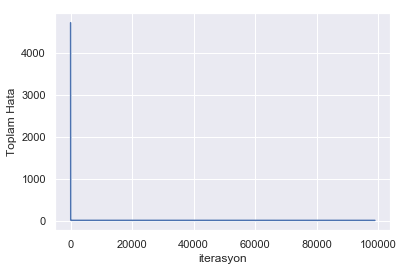

In [41]:
plt.plot(reg.Js)
plt.xlabel('iterasyon'); plt.ylabel('Toplam Hata'); 

## Verimiz 

In [43]:
veri.head()

,not0,not1,not2,toplam
0,39.0,73.0,38.0,160.0
1,68.0,62.0,62.0,202.0
2,98.0,7.0,73.0,188.0
3,38.0,51.0,20.0,119.0
4,77.0,84.0,93.0,264.0


# SKlearn Lineer Regresyon

In [44]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = veri.iloc[:, :-1].values
y = veri.iloc[:, -1].values

# Split dataset into train ab=nd test sets
X_train, X_test, y_train, t_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

In [45]:
# fit simple linear regression model to the data
lr = LinearRegression()
lr.fit(X_train, y_train)
# make predicitions
y_pred = lr.predict(X_test)

In [46]:
lr.coef_

array([1., 1., 1.])

In [47]:
lr.intercept_

10.000000000000057